In [1]:
from joblib import dump, load
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = plt.imread("./test/test.png")

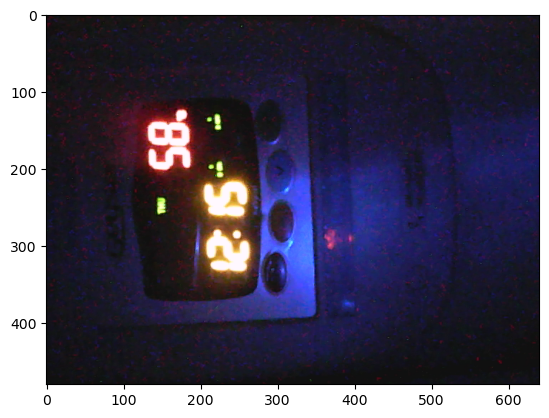

In [3]:
plt.imshow(image)

In [4]:
# We are only interested in the digits
def reform(image, x1, y1, x2, y2, x3, y3, x4, y4, W, H):
    delta_x_start = (x3 - x1)/H;
    delta_x_end = (x4 - x2)/H;

    delta_y_start = (y2 - y1)/W;
    delta_y_end = (y4 - y3) /W;

    out = np.zeros((H, W, 1))

    for w in range(W):
        for h in range(H):
            x_start = x1 + delta_x_start*h
            x_end = x2 + delta_x_end*h
            
            x_step = (x_end - x_start)/W

            y_start = y1  + delta_y_start*w
            y_end = y3 + delta_y_end*w
            y_step = (y_end - y_start)/H

            x_ref = x_start + x_step*w
            y_ref = y_start + y_step*h

            out[h,w] = image[int(y_ref),int(x_ref)]
    return out
    
# This is where the digits are
left = 134
right = 192
top = 145
bottom = 208

# Get the digits
image = reform(image[:,:,1], left, top, right, top, left, bottom, right, bottom, 20, 20)

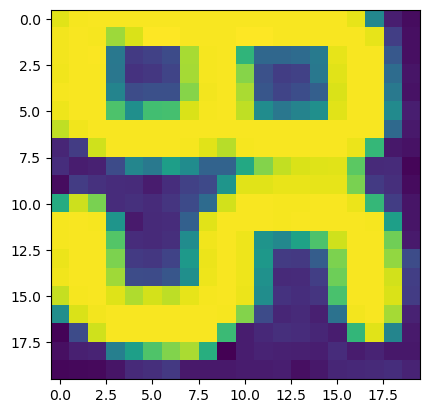

In [5]:
plt.imshow(image)

In [6]:
# Split the digits
def split(image):
    max = int (image.shape[0])
    split = int(image.shape[0] / 2)
    image1 = image[0:split,:]
    image2 = image[split:max,:]
    return image2, image1

leftImage, rightImage = split(image)

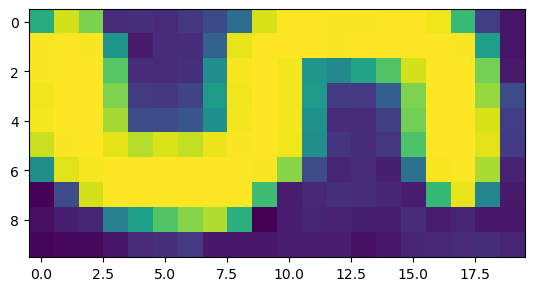

In [7]:
plt.imshow(leftImage)

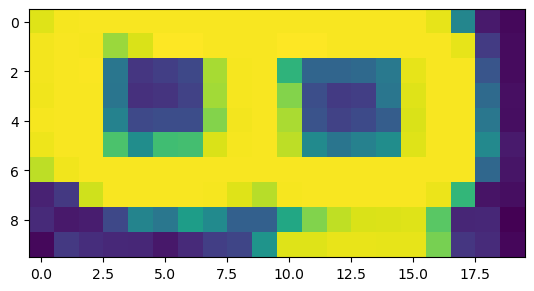

In [8]:
plt.imshow(rightImage)

In [9]:
# Load the trained ML algorithm
clf = load('Perceptron.joblib') 

# Predict ("Read") the digits
predictedLeft = clf.predict(np.resize(leftImage,(1, leftImage.size)))[0]
predictedRight = clf.predict(np.resize(rightImage,(1, rightImage.size)))[0]


In [10]:
predictedLeft

'5'

In [12]:
predictedRight

'8'

In [13]:
temperature = int(predictedLeft + predictedRight)

In [14]:
temperature

58